## **NN Module**

The torch.nn module in PyTorch is a core library that provides a wide array of classes and functions designed to help developers build neural networks efficiently and effectively.

It abstracts the complexity of creating and training neural networks by offering pre-built layers, loss functions, activation functions, and other utilities, enabling you to focus on designing and experimenting with model architectures.


## **Key Components of torch.nn:**

1. **Modules (Layers):**
- `nn.Module`: The base class for all neural network modules. Your custom models and layers should subclass this class.

- `Common Layers`: Includes layers like nn.Linear (fully connected layer), nn.Conv2d (convolutional layer), nn.LSTM (recurrent layer), and many others.

2. **Activation Functions:**

- Functions like nn.ReLU, nn.Sigmoid, and nn.Tanh introduce non-linearities to the
model, allowing it to learn complex patterns.

3. **Loss Functions:**

- Provides loss functions such as nn.CrossEntropyLoss, nn.MSELoss, and nn.NLLLoss to quantify the difference between the model's predictions and the actual targets.

4. Container Modules:

- nn.Sequential: A sequential container to stack layers in order.

5. **Regularization and Dropout:**

- Layers like nn.Dropout and nn.BatchNorm2d help prevent overfitting and improve
the model's ability to generalize to new data.


**Lets Make a simple Setup**

1 neuron with 5 inputs. Gives output


In [1]:
import torch
import torch.nn as nn

In [2]:
# Create a Model Class

class MyModel(nn.Module):

  # We define how many input features will be there
  def __init__(self, num_features):
    # Invoke parent constructor
    super().__init__()

    # Create Layer
    self.linear = nn.Linear(in_features=num_features,out_features=1)
    # define input featurs and output features

    # Define Activation Function
    self.sigmoid = nn.Sigmoid()

  def forward_pass(self,features):
    """
    Here we will calculate the output of the forward pass when recieving inputs. Basically (w*x + b)
    """

    z = self.linear(features)
    out = self.sigmoid(z)

    return out


In [3]:
# testing dataset

sample_data = torch.rand(10,5)

In [4]:
sample_data.shape

torch.Size([10, 5])

In [5]:
# Create Model

model = MyModel(sample_data.shape[1])
# why sending shape 1 because we need to send number of features only not rows/data

In [6]:
"""
We call directly call this forward method without accessing it because in PyTorch they have override the `__call__` method. But for this to work you need to make sure to name the forward pass method as same as `forward`.
And then you can simply run model(sample_data) and this will work.

But in My case it wont work because my method name is different than default name
"""
# forward pass
model.forward_pass(sample_data)

tensor([[0.5840],
        [0.7338],
        [0.6826],
        [0.6840],
        [0.6630],
        [0.6682],
        [0.6388],
        [0.6831],
        [0.6571],
        [0.6527]], grad_fn=<SigmoidBackward0>)

In [7]:
"""
Weights of the Model.
We have not created any weights and bias but still we can acess that
"""

# weight
print("Weights:",model.linear.weight)
print()
print("Bias:",model.linear.bias)

Weights: Parameter containing:
tensor([[-0.0856,  0.3348,  0.3959,  0.3816,  0.2643]], requires_grad=True)

Bias: Parameter containing:
tensor([0.1336], requires_grad=True)


## **Visualize the Network**

In [8]:
!pip install torchinfo

In [9]:
from torchinfo import summary

In [10]:
summary(model, input_size=(10,5))

RuntimeError: Failed to run torchinfo. See above stack traces for more details. Executed layers up to: []

## Lets make Another.

- 5 inputs
- one hidden layer with 3 nuerons
- one layer with 1 neuron
- final output
- Relu Function

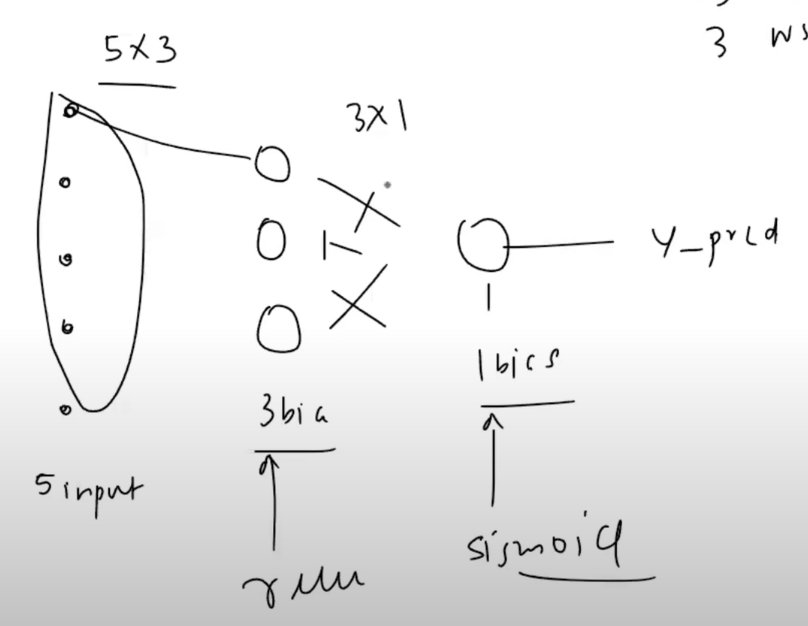

In [11]:
import torch
import torch.nn as nn

In [12]:
class MyModel2(nn.Module):

  def __init__(self, num_features):
    # Invoke parent constructor
    super().__init__()

    # Create Layer 1
    self.linear1 = nn.Linear(in_features=num_features,out_features=3)
    # Here we will have 3 outputs

    # Activation for Hidden Layer
    self.relu = nn.ReLU()

    # 2nd layer we have 2 inputs and 1 output
    self.linear2 = nn.Linear(3, 1)

    # Activation for final neuron
    self.sigmoid = nn.Sigmoid()


  def forward(self,features):

    z = self.linear1(features)
    out = self.relu(z)
    out = self.linear2(out)
    out = self.sigmoid(out)

    return out


In [13]:
example_data = torch.rand(10,5)

In [14]:
example_data.shape

torch.Size([10, 5])

In [15]:
model2 = MyModel2(example_data.shape[1])

In [16]:
model2.forward(example_data)

tensor([[0.6109],
        [0.6100],
        [0.5663],
        [0.6044],
        [0.5610],
        [0.6006],
        [0.5866],
        [0.5881],
        [0.6092],
        [0.5668]], grad_fn=<SigmoidBackward0>)

In [17]:
model2(example_data)

tensor([[0.6109],
        [0.6100],
        [0.5663],
        [0.6044],
        [0.5610],
        [0.6006],
        [0.5866],
        [0.5881],
        [0.6092],
        [0.5668]], grad_fn=<SigmoidBackward0>)

In [18]:
# weight
print("Weights of Layer 1:",model2.linear1.weight)
print()
print("Weights of Layer 2:",model2.linear2.weight)
print()
print("Bias of Layer 1:",model2.linear1.bias)
print()
print("Bias of Layer 2:",model2.linear2.bias)

Weights of Layer 1: Parameter containing:
tensor([[-0.3749,  0.2808,  0.1507,  0.2820,  0.1003],
        [ 0.2700,  0.3917,  0.3206,  0.2002, -0.3624],
        [-0.1608, -0.4245,  0.1572,  0.0152,  0.3890]], requires_grad=True)

Weights of Layer 2: Parameter containing:
tensor([[-0.5249, -0.0631, -0.4505]], requires_grad=True)

Bias of Layer 1: Parameter containing:
tensor([-0.1179, -0.0886, -0.2974], requires_grad=True)

Bias of Layer 2: Parameter containing:
tensor([0.4603], requires_grad=True)


In [19]:
from torchinfo import summary

In [20]:
summary(model2, input_size=(10,5))

Layer (type:depth-idx)                   Output Shape              Param #
MyModel2                                 [10, 1]                   --
├─Linear: 1-1                            [10, 3]                   18
├─ReLU: 1-2                              [10, 3]                   --
├─Linear: 1-3                            [10, 1]                   4
├─Sigmoid: 1-4                           [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

## **Making it More Simple Using Container**


There is still lot of task which  we are manually doing such as:

- creating individual layers
- caculating z and activation function and all.

We can replace all this with container.

In [21]:
class MyModel3(nn.Module):

  def __init__(self, num_features):
    # Invoke parent constructor
    super().__init__()

    """
    Now here rather than creating each layer individually.
    We can simply make it using Sequence Layer.
    """

    self.network = nn.Sequential(
      nn.Linear(num_features,3),
      # Hidden Layer
      nn.ReLU(),
      # 2nd layer
      nn.Linear(3, 1),
      # Activation for final neuron
      nn.Sigmoid(),
    )

  def forward(self,features):
    """
    Now rather than calculating everything.
    We will now simply pass the features to network and it will handle all the task.
    """
    out = self.network(features)

    return out


In [22]:
example_data = torch.rand(10,5)

In [23]:
example_data.shape

torch.Size([10, 5])

In [25]:
model3 = MyModel3(example_data.shape[1])

In [26]:
model3.forward(example_data)

tensor([[0.4123],
        [0.3950],
        [0.4096],
        [0.4063],
        [0.4018],
        [0.4157],
        [0.3937],
        [0.3908],
        [0.4006],
        [0.3992]], grad_fn=<SigmoidBackward0>)

In [33]:
# weight
print("Weights of Layer 1:",model3.network[0].weight)
print()
print("Weights of Layer 2:",model3.network[2].weight)
print()
print("Bias of Layer 1:",model3.network[0].bias)
print()
print("Bias of Layer 2:",model3.network[2].bias)

Weights of Layer 1: Parameter containing:
tensor([[ 0.4159, -0.1183, -0.2755,  0.0148,  0.1741],
        [-0.3016, -0.3304,  0.2760,  0.2739, -0.3762],
        [-0.2966, -0.2991, -0.1431, -0.1771,  0.3579]], requires_grad=True)

Weights of Layer 2: Parameter containing:
tensor([[ 0.1649, -0.4494,  0.0422]], requires_grad=True)

Bias of Layer 1: Parameter containing:
tensor([ 0.3128, -0.1612, -0.0299], requires_grad=True)

Bias of Layer 2: Parameter containing:
tensor([-0.4640], requires_grad=True)


## **Torch Optim Module**

torch.optim is a module in PyTorch that provides a variety of optimization
algorithms used to update the parameters of your model during training.

It includes common optimizers like Stochastic Gradient Descent (SGD), Adam,
RMSprop, and more.

It handles weight updates efficiently, including additional features like learning rate scheduling and weight decay (regularization).

The model.parameters() method in PyTorch retrieves an iterator over all the
trainable parameters (weights and biases) in a model.
These parameters are instances of torch.nn.Parameter and include:
- Weights: The weight matrices of layers like nn.Linear, nn.Conv2d, etc.
- Biases: The bias terms of layers (if they exist).

The optimizer uses these parameters to compute gradients and update them
during training.
